<a href="https://colab.research.google.com/github/AKHILM20DS007/AKHILM20DS007/blob/main/TASK%20KAATTRU%20IIT%20MADRAS%20INTERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KAATRU - IIT MADRAS
Data Scientist: Assessment Round 1

## Goal:
Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation.

## Outcome:
The variables that are significant in predicting the demand for shared bikes (at least 3).

Note: cnt is the dependent variable

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#supress the warnings
import warnings 
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv(r"/content/drive/MyDrive/DATA SCIENCE /day - day.csv")

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [6]:
data.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796
729,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,2729


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [8]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [9]:
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [10]:
#lets round the digits, as for prediction we dont need so much precision 

data[['temp', 'atemp', 'hum', 'windspeed']]=data[['temp', 'atemp', 'hum', 'windspeed']].round(decimals=0)

In [11]:
#lets verify the operations

data[['temp', 'atemp', 'hum', 'windspeed']].head()

,temp,atemp,hum,windspeed
0,14.0,18.0,81.0,11.0
1,15.0,18.0,70.0,17.0
2,8.0,9.0,44.0,17.0
3,8.0,11.0,59.0,11.0
4,9.0,11.0,44.0,13.0


In [12]:
#lets see the correlation
data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333352,0.341072,0.206431,-0.230908,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.047677,0.048125,-0.112767,-0.012403,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.217969,0.224637,0.223504,-0.209957,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.031342,-0.030854,-0.016183,0.006097,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.046606,0.040678,0.009056,-0.013557,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002780,0.009615,0.054205,-0.001325,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119695,-0.122892,0.591126,0.039104,-0.295929
temp,3.333522e-01,4.767703e-02,2.179688e-01,-0.031342,0.046606,0.002780,-0.119695,1.000000,0.990281,0.129068,-0.164112,0.627000
atemp,3.410719e-01,4.812480e-02,2.246365e-01,-0.030854,0.040678,0.009615,-0.122892,0.990281,1.000000,0.139958,-0.189864,0.632085
hum,2.064314e-01,-1.127666e-01,2.235044e-01,-0.016183,0.009056,0.054205,0.591126,0.129068,0.139958,1.000000,-0.247690,-0.099506


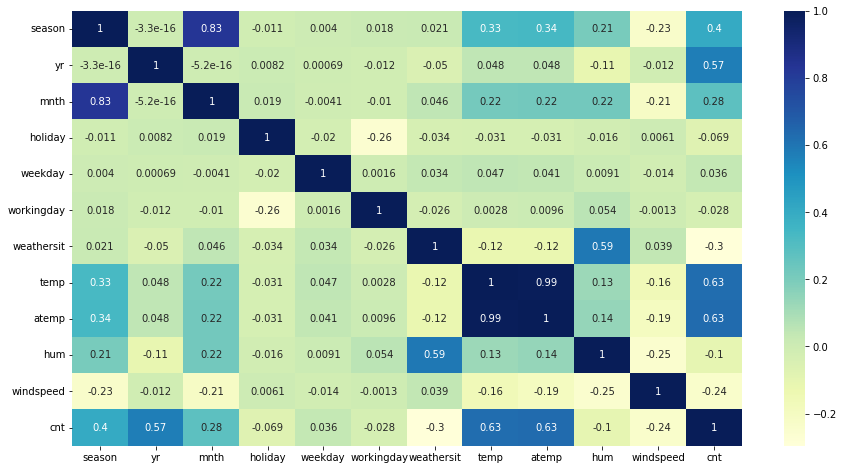

In [13]:
#lets see the correlation
plt.figure(figsize=(15,8), )
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")

In [14]:
#we observe that temp and atemp have very high correlation 0.99. And that is expected as both columns represent the temperature. 
#this will cause multicollinarity issue later on so lets drop atemp column
data.drop(["atemp"],axis=1,inplace=True)

In [15]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.0,81.0,11.0,985
1,1,0,1,0,2,1,2,15.0,70.0,17.0,801
2,1,0,1,0,3,1,1,8.0,44.0,17.0,1349
3,1,0,1,0,4,1,1,8.0,59.0,11.0,1562
4,1,0,1,0,5,1,1,9.0,44.0,13.0,1600


In [16]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.323288,62.768493,12.768493,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.532982,14.259109,5.194420,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,2.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,14.000000,52.000000,9.000000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.000000,63.000000,12.000000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,27.000000,73.000000,16.000000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.000000,97.000000,34.000000,8714.000000


In [17]:
data.loc[:,:]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.0,81.0,11.0,985
1,1,0,1,0,2,1,2,15.0,70.0,17.0,801
2,1,0,1,0,3,1,1,8.0,44.0,17.0,1349
3,1,0,1,0,4,1,1,8.0,59.0,11.0,1562
4,1,0,1,0,5,1,1,9.0,44.0,13.0,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.0,65.0,23.0,2114
726,1,1,12,0,6,0,2,10.0,59.0,10.0,3095
727,1,1,12,0,0,0,2,10.0,75.0,8.0,1341
728,1,1,12,0,1,1,1,10.0,48.0,24.0,1796


In [18]:
# Converting the above mentioned columns into categories

data.season = data.season.astype('category')
data.weekday = data.weekday.astype('category')
data.mnth = data.mnth.astype('category')
data.weathersit = data.weathersit.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [19]:
# Creating dummies of the converted variables and dropping the first variable as (n-1) 
# factors are needed for the dummy variables.

data_new = pd.get_dummies(data, drop_first=True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

In [20]:
data_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.0,81.0,11.0,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,15.0,70.0,17.0,801,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.0,44.0,17.0,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.0,59.0,11.0,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.0,44.0,13.0,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Using the train_test_split method for achieving train and test dataset

data_train,data_test = train_test_split(data_new, train_size=0.70, test_size=0.30, random_state=0)

In [23]:
# Checking the shape of train set

data_new.shape

(730, 29)

In [24]:
#lets check the shape
print(data_train.shape)
print(data_test.shape)

(510, 29)
(219, 29)


In [25]:
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,28.0,60.0,17.0,5130,0,1,0,...,0,0,0,0,0,0,1,0,0,0
524,1,0,0,29.0,44.0,10.0,7498,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,7.0,47.0,20.0,1406,0,0,0,...,0,0,0,0,0,0,0,1,0,0
161,0,0,1,30.0,65.0,10.0,4966,1,0,0,...,0,0,1,0,0,0,0,0,0,0
556,1,0,1,29.0,63.0,10.0,7264,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,28.0,60.0,17.0,5130,0,1,0,...,0,0,0,0,0,0,1,0,0,0
524,1,0,0,29.0,44.0,10.0,7498,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,7.0,47.0,20.0,1406,0,0,0,...,0,0,0,0,0,0,0,1,0,0
161,0,0,1,30.0,65.0,10.0,4966,1,0,0,...,0,0,1,0,0,0,0,0,0,0
556,1,0,1,29.0,63.0,10.0,7264,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
# Checking for the numerical columns
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [28]:
# lets see for the whole dataset
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.029412,0.701961,20.117647,62.394118,12.835294,4489.303922,0.258824,0.256863,0.239216,...,0.080392,0.082353,0.141176,0.135294,0.139216,0.160784,0.149020,0.137255,0.335294,0.023529
std,0.500491,0.169124,0.457846,7.644989,14.007000,5.153854,1886.652185,0.438419,0.437332,0.427024,...,0.272166,0.275172,0.348545,0.342373,0.346511,0.367693,0.356457,0.344454,0.472557,0.151726
min,0.000000,0.000000,0.000000,4.000000,25.000000,3.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.000000,51.250000,9.000000,3196.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.000000,62.000000,12.000000,4558.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.000000,72.000000,16.000000,5847.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.000000,97.000000,30.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


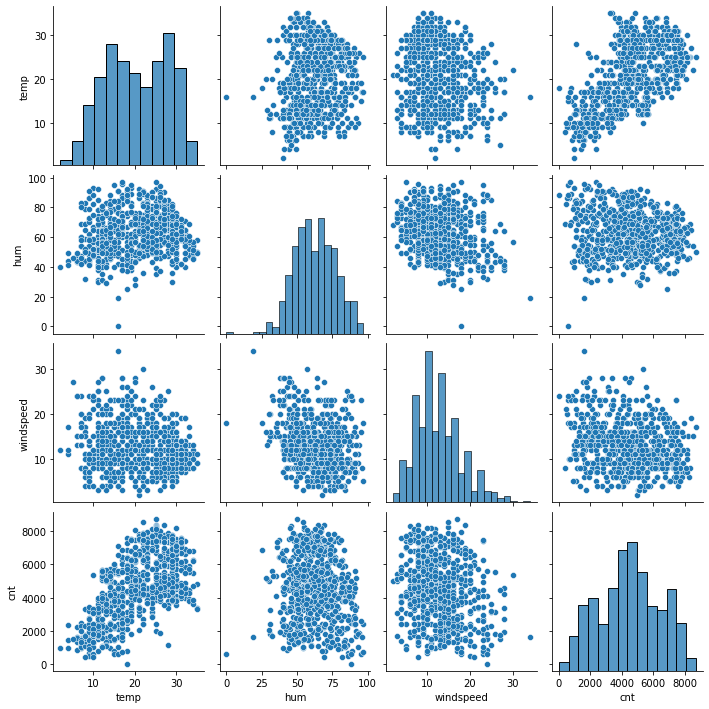

In [29]:
# Creating a pairplot using the numerical columns

data1 = data[['temp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(data1)
plt.show()

## scaling Features
use min max scalar

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler() #creating a object of MinMaxScaler class


In [32]:
data_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.0,81.0,11.0,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,15.0,70.0,17.0,801,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.0,44.0,17.0,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.0,59.0,11.0,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.0,44.0,13.0,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
#we know that the following columns have numerical values
num_var = ['temp','hum','windspeed','cnt']
#lets scale them
data_train[num_var] = scaler.fit_transform(data_train[num_var])

In [34]:
#After scaling the data
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,0.774194,0.486111,0.518519,0.587667,0,1,0,...,0,0,0,0,0,0,1,0,0,0
524,1,0,0,0.806452,0.263889,0.259259,0.860101,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0.096774,0.305556,0.629630,0.159227,0,0,0,...,0,0,0,0,0,0,0,1,0,0
161,0,0,1,0.838710,0.555556,0.259259,0.568799,1,0,0,...,0,0,1,0,0,0,0,0,0,0
556,1,0,1,0.806452,0.527778,0.259259,0.833180,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:

data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.029412,0.701961,0.519924,0.519363,0.364270,0.513956,0.258824,0.256863,0.239216,...,0.080392,0.082353,0.141176,0.135294,0.139216,0.160784,0.149020,0.137255,0.335294,0.023529
std,0.500491,0.169124,0.457846,0.246613,0.194542,0.190883,0.217056,0.438419,0.437332,0.427024,...,0.272166,0.275172,0.348545,0.342373,0.346511,0.367693,0.356457,0.344454,0.472557,0.151726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.290323,0.364583,0.222222,0.365221,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.516129,0.513889,0.333333,0.521859,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741935,0.652778,0.481481,0.670156,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building a model

In [36]:
#dependant variable 
y_train = data_train.pop('cnt')

#independant variable
X_train = data_train

## RFE - Recursive Feature Elimination
What Is Recursive Feature Elimination?
Recursive Feature Elimination, or RFE Feature Selection, is a feature selection process that reduces a model’s complexity by choosing significant features and removing the weaker ones. The selection process eliminates these less relevant features one by one until it has achieved the optimum number needed to assure peak performance.

Recursive Feature Elimination narrows down the number of features, resulting in a corresponding increase in model efficiency.

Machine learning data sets for regression or classification consist of rows and columns, resembling an Excel spreadsheet. Rows are often called “samples,” and columns are known as “features.” Feature selection in the machine learning context refers to techniques that pick a subset of the data set's most appropriate features (e.g., columns). 

RFE can be used to handle problems presented by the two models listed below:

Classification: Classification predicts the class of selected data points. Classes are also known as targets, labels, or categories. Classification predictive modeling involves approximating a mapping function (f) from input variables (X) to discrete output variables (y).

Regression: Regression models supply a function describing the relationship between one (or more) independent variables and a response, dependent, or target variable.

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 15
#as we have decided to keep 10 or less columns in our final model lets start with 15
#and then manually determine which are important

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,step=15)             
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 2),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', False, 2),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [40]:
# Storing the 'True' columns from the rfe.support_ list

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_5', 'mnth_9', 'mnth_10',
       'weathersit_3'],
      dtype='object')

In [41]:
# Having a look to the columns that haven't been taken by the rfe.support_

X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2'],
      dtype='object')

 Building model using statsmodel, for the detailed statistics

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_sm = X_train[col]

#adding constant for the intercept 

# What is Multicollinearity?
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

This means that an independent variable can be predicted from another independent variable in a regression model. For example, height and weight, household income and water consumption, mileage and price of a car, study time and leisure time, etc.

# The Problem with having Multicollinearity
Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. For example, let’s assume that in the following linear equation:

Y = W0+W1*X1+W2*X2

Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.

“ This makes the effects of X1 on Y difficult to distinguish from the effects of X2 on Y. ”

Multicollinearity may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.

# What causes Multicollinearity?
Multicollinearity could occur due to the following problems:

Multicollinearity could exist because of the problems in the dataset at the time of creation.
Multicollinearity could also occur when new variables are created which are dependent on other variables:

Including identical variables in the dataset:
For example, including variables for temperature in Fahrenheit and temperature in Celsius
Inaccurate use of dummy variables can also cause a multicollinearity problem. This is called the Dummy variable trap:

Insufficient data in some cases can also cause multicollinearity problems

#Detecting Multicollinearity using VIF
Multicollinearity can be detected via various methods., we will focus on the most common one – VIF (Variable Inflation Factors).

” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “

or

VIF score of an independent variable represents how well the variable is explained by other independent variables.

R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. This is captured by the VIF which is denoted below:

VIF formula 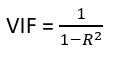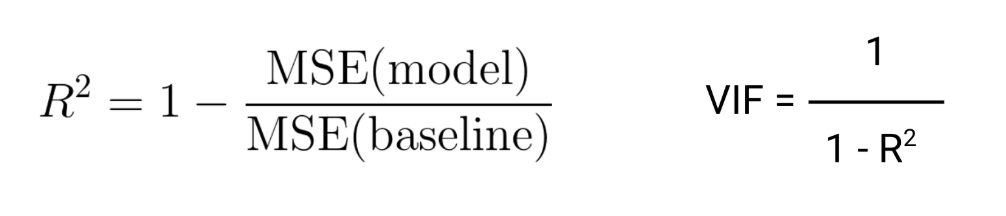

So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

VIF starts at 1 and has no upper limit
VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

#Fixing Multicollinearity
Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:

However, multicollinearity may not be a problem every time. The need to fix multicollinearity depends primarily on the below reasons:

When you care more about how much each individual feature rather than a group of features affects the target variable, then removing multicollinearity may be a good option

If multicollinearity is not present in the features you are interested in, then multicollinearity may not be a problem.

In [43]:
#function to run the linear model and get the statistic summary 
def fit_lr(x,y):
    
    #running the linear model
    lr = sm.OLS(y,x)
    lr_model = lr.fit()
    #printing the summary of the model 
    print(lr_model.summary())
    return(lr_model)

In [44]:
#function to calculate vif
def check_vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF',ascending=False)
    print(vif)

lets keep this a guideline to keep or remove the column

high pvalue high vif remove first      
high pvalue low vif remove second          
low pvalue high vif remove third            
low pvalue low vif keep the column 

In [45]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
#checking the statistics for the columns we got from RFE
fit_lr(X_train_sm,y_train)
check_vif(X_train_sm)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1008.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:48:24   Log-Likelihood:                          436.57
No. Observations:                 510   AIC:                                     -845.1
Df Residuals:                     496   BIC:                                     -785.9
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [47]:
#so lets drop that column 
X_train_new = X_train_sm.drop(["mnth_10"], axis = 1)

#now lets see how the model is 
lr_model = fit_lr(X_train_new,y_train)
check_vif(X_train_new)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1083.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:48:24   Log-Likelihood:                          435.47
No. Observations:                 510   AIC:                                     -844.9
Df Residuals:                     497   BIC:                                     -789.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [48]:
#so lets drop that column 
X_train_new = X_train_sm.drop(["mnth_5"], axis = 1)

#now lets see how the model is 
lr_model = fit_lr(X_train_new,y_train)
check_vif(X_train_new)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1078.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:48:24   Log-Likelihood:                          434.43
No. Observations:                 510   AIC:                                     -842.9
Df Residuals:                     497   BIC:                                     -787.8
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [49]:
#so lets drop that column 
X_train_new = X_train_sm.drop(["season_3"], axis = 1)

#now lets see how the model is 
lr_model = fit_lr(X_train_new,y_train)
check_vif(X_train_new)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1067.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:48:24   Log-Likelihood:                          431.96
No. Observations:                 510   AIC:                                     -837.9
Df Residuals:                     497   BIC:                                     -782.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [50]:
lr_model.params

yr              0.239085
holiday        -0.037545
workingday      0.011538
temp            0.648512
hum            -0.060712
windspeed       0.009466
season_2        0.078276
season_4        0.159928
mnth_3          0.057316
mnth_5          0.031090
mnth_9          0.090218
mnth_10         0.018340
weathersit_3   -0.222431
dtype: float64

#observation
we observe that now all the columns have pvalue < 0.5 and all vif are < 5 
we observe that Prob (F-statistic) is very small, hence the overall fit to the model is significant. 


# Hypothesis statement states that:

H0 : B1 = B2 = ... = Bn = 0

H1 : Bi != 0

Here H0 --> Null Hypothesis
     H1 --> Alternate Hypothesis.



#Model coefficient values,

yr              0.243128

holiday        -0.041222

temp            0.568455

hum            -0.046365

windspeed       0.021679

season_2        0.114164

season_3        0.072795

season_4        0.184145

mnth_3          0.067596

mnth_5          0.040573

mnth_9          0.075809

mnth_10         0.030119

weathersit_3   -0.227182



##### Insight:

- It is evident from the Model 8 that none of the coefficients are equal to 0, which means REJECT THE NULL HYPOTHESIS.

### F-Statistic:

- F-Statistic is used for overall significance of the model.
    - The F-Statistic value: 1067.
    - The Prob(F-Statistic) value : 0.00

- So, as the P-Value is ~0.000 and from the F-Statistic data we can conclude that our prediction model is significant.

In [51]:
y_train_pred = lr_model.predict(X_train_new)

Text(0.5, 0, 'Errors')

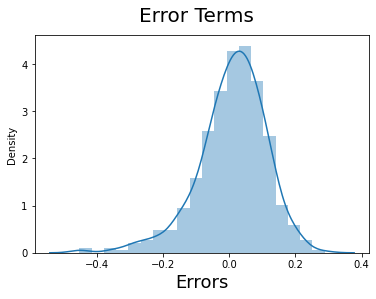

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

#we observe that the error terms are normally distributed with mean at 0

## Making Predictions

In [59]:
#we observe that the following columns have numerical values
num_var = ['temp','hum','windspeed','cnt']

#lets scale them
data_test[num_var] = scaler.transform(data_test[num_var])

In [60]:
#Dividing into x test and y test
y_test = data_test.pop('cnt')
X_test = data_test

In [61]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

In [62]:
X_test_new = X_test_new[X_train_new.columns]

In [63]:
# Making predictions
y_test_pred = lr_model.predict(X_test_new)

In [64]:
#test set
r2_score(y_true= y_test, y_pred=y_test_pred)

-56968136.72951404

## Model Evaluation

Text(0, 0.5, 'y__test_pred')

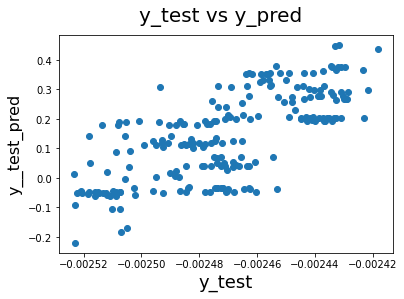

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y__test_pred', fontsize=16)                          # Y-label

# we observe that the error terms are independent and have constant variance

Text(0.5, 1.0, 'y_test vs y_pred')

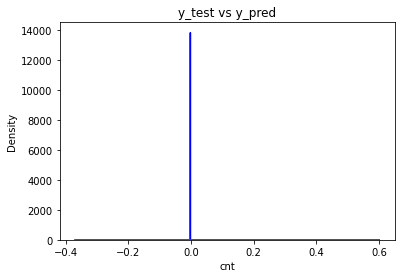

In [66]:
width=6
height=4
plt.figure(figsize=(width,height))
sns.distplot(y_test,hist=False,color='b',label="Fitted Value")
sns.distplot(y_test_pred,hist=False,color='g',label="Fitted Value")

plt.title("y_test vs y_pred")

In [67]:
#train set
r2_score(y_true= y_train, y_pred=y_train_pred)

0.7711469397287748

In [68]:
#test set
r2_score(y_true= y_test, y_pred=y_test_pred)

-56968136.72951404